# ECS 171 Housing Dataset
## Regression Model Building

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# importing data from csv file to dataframe using pandas library
housing_data = pd.read_csv('housing.csv')
display(housing_data)

#obtaining data summary
print('Size of the dataset and the number of features are:')
housing_data.shape

print('\nColumn names in the dataset:')
housing_data.columns

housing_data.info()
## drop the missing vale datapoint
housing_data.dropna(inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Size of the dataset and the number of features are:

Column names in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [102]:
# correlatiton between variables
print(housing_data.corr())

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

In [103]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import OneClassSVM
from numpy import where
import operator

In [104]:
oec = OneHotEncoder()
ocean_proximity_encoded = oec.fit_transform(housing_data[['ocean_proximity']]).toarray()

columns = oec.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=columns)

ocean_proximity_df.index = housing_data.index

## drop two columns (ocean_proximity and median_house_value)
## because we add onehotencoder for ocean_proximity
## and we need to predict median house value
X = pd.concat([housing_data.drop(['ocean_proximity', 'median_house_value'], axis=1), ocean_proximity_df], axis=1)
y = housing_data['median_house_value']

In [105]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0


### Simple linear regression



In [106]:
X.fillna(X.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()

## train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [107]:
model.score(X_test,y_test)

0.6476418154011279

In [108]:
# @title Simple Linear Regression: Mean Absolute Error, Mean Squared Error, Root Meaan Squared Error and R2 values
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2: {r2}")

Mean Absolute Error: 50076.4329862372
Mean Squared Error: 4895549730.445419
Root Mean Squared Error: 69968.20513951618
R2: 0.6476418154011279


### Multiple linear regression

In [109]:
#Importing the libraries
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.shape
y_test.shape
reg_model = linear_model.LinearRegression()

In [111]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [112]:
#Printing the model coefficients
print('Intercept: ', reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  -2221209.241792002


[('longitude', -26509.579437828754),
 ('latitude', -25039.025580228285),
 ('housing_median_age', 1061.7812900046883),
 ('total_rooms', -5.392190928891068),
 ('total_bedrooms', 96.73864565810254),
 ('population', -37.41584529172178),
 ('households', 47.64269838380369),
 ('median_income', 38860.51393440793),
 ('ocean_proximity_<1H OCEAN', -25814.389777963384),
 ('ocean_proximity_INLAND', -66427.18022001676),
 ('ocean_proximity_ISLAND', 142821.21242825306),
 ('ocean_proximity_NEAR BAY', -28657.270183123186),
 ('ocean_proximity_NEAR OCEAN', -21922.372247149655)]

In [113]:
#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [114]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 95838.85514842 153242.24452872 143836.11961657 ... 259772.76502962
 319928.14410036 231660.71728228]


In [115]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
19595,195800.0,95838.855148
20137,162500.0,153242.244529
4448,191700.0,143836.119617
13960,189700.0,133008.558238
15567,248300.0,263116.368034
...,...,...
6429,175000.0,183212.994309
15125,285400.0,241828.292320
496,309600.0,259772.765030
18299,461200.0,319928.144100


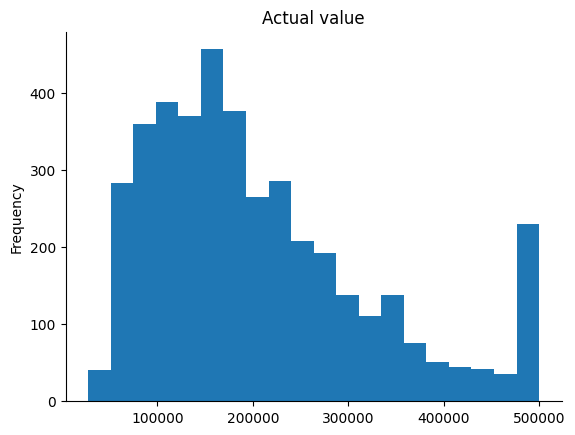

In [116]:
# @title Actual value

from matplotlib import pyplot as plt
reg_model_diff['Actual value'].plot(kind='hist', bins=20, title='Actual value')
plt.gca().spines[['top', 'right',]].set_visible(False)

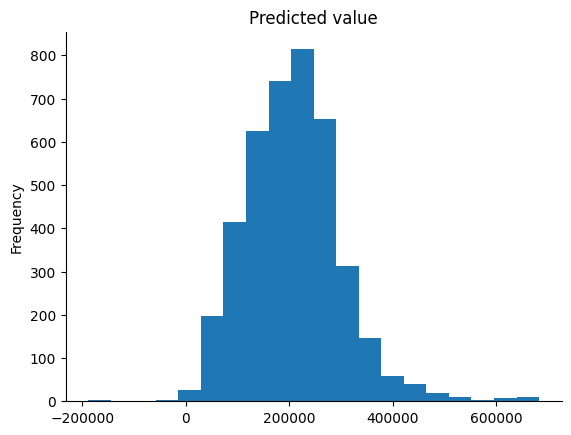

In [117]:
# @title Predicted value

from matplotlib import pyplot as plt
reg_model_diff['Predicted value'].plot(kind='hist', bins=20, title='Predicted value')
plt.gca().spines[['top', 'right',]].set_visible(False)

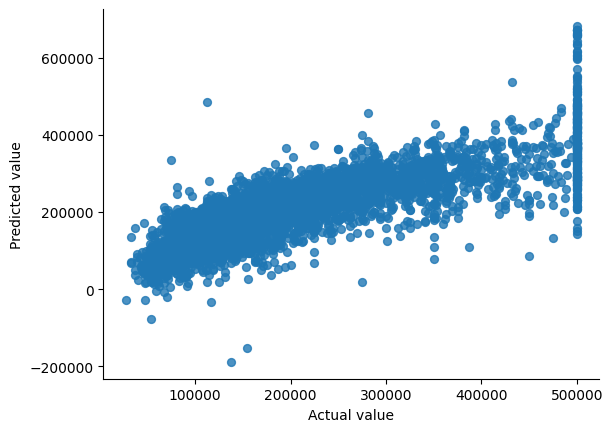

In [118]:
# @title Actual value vs Predicted value

from matplotlib import pyplot as plt
reg_model_diff.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [119]:
# @title Multiple Linear Regression: Mean Absolute Error, Mean Squared Error, Root Meaan Squared Error and R2 values
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")

Mean Absolute Error: 50572.83039873077
Mean Square Error: 4771833834.834414
Root Mean Squared Error: 69078.46143939812
R2: 0.6497391423849397
